# Use Customized Notebook Template (CLAIMS_RESERVE_Template)

In [7]:
from snowflake.snowpark import Session

# Data Science Libs
import numpy as np
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns

# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from fosforio import snowflake

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


In [8]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

table_name = 'AUTO_INSURANCE_CLAIMS_DATA'
sf_df = my_session.sql("select * from {}".format(table_name))


In [9]:
sf_df.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"MONTHS_AS_CUSTOMER"  |"CUSTOMER_AGE"  |"POLICY_NUMBER"  |"POLICY_BIND_DATE"  |"POLICY_STATE"  |"POLICY_CSL"  |"POLICY_DEDUCTABLE"  |"POL

In [9]:
sf_df.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"MONTHS_AS_CUSTOMER"  |"CUSTOMER_AGE"  |"POLICY_NUMBER"  |"POLICY_BIND_DATE"  |"POLICY_STATE"  |"POLICY_CSL"  |"POLICY_DEDUCTABLE"  |"POL

In [5]:
#df = snowflake.get_dataframe("AUTO_INSURANCE_CLAIMS_DATA_PRODUCT")
insurance_claim = df.copy()

In [6]:
insurance_claim.columns = insurance_claim.columns.str.lower()

In [7]:
insurance_claim.columns

Index(['months_as_customer', 'customer_age', 'policy_number',
       'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day', 'incident_time_of_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount_paid',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
insurance_claim.rename(columns = {'total_claim_amount_paid': 'total_claim_amount'}, inplace=True)

In [9]:
insurance_claim=insurance_claim.replace("?",np.NaN)

In [10]:
### changing Incident date into datetime format
insurance_claim['incident_date']=pd.to_datetime(insurance_claim['incident_date'],format='%Y-%m-%d')

### changing auto_year date into datetime format
insurance_claim['auto_year']=pd.to_datetime(insurance_claim['auto_year'],format='%Y')

In [11]:
### Intialize "count" column

insurance_claim['count']=1

In [12]:
#plt.figure(figsize=[5,4])
fig = px.pie(insurance_claim,names='fraud_reported')
fig.write_html("/data/EDA/Fraud_Reported_Pie_Distribution.html")

In [13]:
insurance_claim['fraud_reported'].value_counts()

fraud_reported
No Fraud Reported    199657
Fraud Reported        34608
Name: count, dtype: int64

In [14]:
### Datasplitting into fraud and not fraud category

insurance_claim_f=insurance_claim[insurance_claim['fraud_reported']=='Fraud Reported']
insurance_claim_nf=insurance_claim[insurance_claim['fraud_reported']=='No Fraud Reported']

In [15]:
fig = px.box(insurance_claim, x="policy_state", y="total_claim_amount", color="fraud_reported")
fig.write_html("/data/EDA/Policy_State_vs_FraudClaims.html")

In [16]:
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='total_claim_amount',color='fraud_reported',marginal_x='histogram',marginal_y='histogram',trendline='ols')
fig.write_html("/data/EDA/Policy_Premium_vs_FraudClaims.html")

In [17]:
fig=px.scatter(insurance_claim,x='customer_age',y='total_claim_amount',color='fraud_reported',marginal_x='box',marginal_y='violin',trendline='ols')
fig.write_html("/data/EDA/CustomerAge_vs_FraudClaims.html")

In [18]:
groupdf_is=insurance_claim.groupby(by=['insured_sex','fraud_reported']).count()
groupdf_is.reset_index(inplace=True)
groupdf_is=groupdf_is[['insured_sex','fraud_reported','count']]
groupdf_is.head()

insured_sex     fraud_reported   count
0      FEMALE     Fraud Reported   17237
1      FEMALE  No Fraud Reported   99573
2        MALE     Fraud Reported   17371
3        MALE  No Fraud Reported  100084

In [19]:
fig=px.bar(groupdf_is,x='insured_sex',y='count',color='fraud_reported',text='count',pattern_shape_sequence=['|','/'],pattern_shape='fraud_reported')
fig.write_html("/data/EDA/InsuredSex_vs_FraudClaims.html")

In [20]:
groupdf_uu=insurance_claim.groupby(by=['umbrella_limit','fraud_reported']).count()
groupdf_uu.reset_index(inplace=True)
groupdf_uu=groupdf_uu[['umbrella_limit','fraud_reported','count']]
groupdf_uu.head(3)

umbrella_limit     fraud_reported  count
0               0     Fraud Reported   4084
1               0  No Fraud Reported  27015
2         2000003  No Fraud Reported      4

In [21]:
fig=px.bar(groupdf_uu,x='umbrella_limit',y='count',color='fraud_reported',text='count')
fig.write_html("/data/EDA/UmbrellaLimit_vs_FraudClaims.html")

In [22]:
groupdf_el=insurance_claim.groupby(by=['insured_education_level','fraud_reported']).count()
groupdf_el.reset_index(inplace=True)
groupdf_el=groupdf_el[['insured_education_level','fraud_reported','count']]
groupdf_el.head()

insured_education_level     fraud_reported  count
0               Associate     Fraud Reported   4993
1               Associate  No Fraud Reported  29157
2                 College     Fraud Reported   4328
3                 College  No Fraud Reported  23975
4             High School     Fraud Reported   5100

In [23]:
fig=px.bar(groupdf_el,x='insured_education_level',y='count',color='fraud_reported',text='count',title="Insurance Claim for different education Level")
fig.write_html("/data/EDA/InsuredEducationLevel_vs_FraudClaims.html")

In [24]:
groupdf_ic=insurance_claim.groupby(by=['insured_occupation','fraud_reported']).count()
groupdf_ic.reset_index(inplace=True)
groupdf_ic=groupdf_ic[['insured_occupation','fraud_reported','count']]
groupdf_ic.head()

insured_occupation     fraud_reported  count
0       adm-clerical     Fraud Reported   2330
1       adm-clerical  No Fraud Reported  12980
2       armed-forces     Fraud Reported   2395
3       armed-forces  No Fraud Reported  13700
4       craft-repair     Fraud Reported   2106

In [25]:
fig=px.bar(groupdf_ic,x='insured_occupation',y='count',color='fraud_reported',text='count',title='Number of Claims diffrent Occupation')
fig.write_html("/data/EDA/InsuredOccupation_vs_FraudClaims.html")

In [26]:
groupdf_h=insurance_claim.groupby(by=['insured_hobbies','fraud_reported']).count()
groupdf_h.reset_index(inplace=True)
groupdf_h=groupdf_h[['insured_hobbies','fraud_reported','count']]
groupdf_h.head()

insured_hobbies     fraud_reported  count
0    base-jumping     Fraud Reported   1663
1    base-jumping  No Fraud Reported   9731
2      basketball     Fraud Reported   1756
3      basketball  No Fraud Reported  10207
4     board-games     Fraud Reported   1765

In [27]:
fig=px.bar(groupdf_h,x='insured_hobbies',y='count',color='fraud_reported',text='count',title="Hobby Wise claim")
fig.write_html("/data/EDA/InsuredHobbies_vs_FraudClaims.html")

In [28]:
groupdf_rl=insurance_claim.groupby(by=['insured_relationship','fraud_reported']).count()
groupdf_rl.reset_index(inplace=True)
groupdf_rl=groupdf_rl[['insured_relationship','fraud_reported','count']]
groupdf_rl.head()

insured_relationship     fraud_reported  count
0              husband     Fraud Reported   5669
1              husband  No Fraud Reported  32950
2        not-in-family     Fraud Reported   5653
3        not-in-family  No Fraud Reported  33389
4       other-relative     Fraud Reported   5837

In [29]:
fig=px.bar(groupdf_rl,x='insured_relationship',y='count',color='fraud_reported',text='count')
fig.write_html("/data/EDA/InsuredRelationship_vs_FraudClaims.html")

In [30]:
groupdf_it=insurance_claim.groupby(by=['incident_type','fraud_reported']).count()
groupdf_it.reset_index(inplace=True)
groupdf_it=groupdf_it[['incident_type','fraud_reported','count']]
groupdf_it.head()

incident_type     fraud_reported  count
0   Multi-vehicle Collision     Fraud Reported  11496
1   Multi-vehicle Collision  No Fraud Reported  62829
2                Parked Car     Fraud Reported   2201
3                Parked Car  No Fraud Reported  19053
4  Single Vehicle Collision     Fraud Reported  20747

In [31]:
fig=px.bar(groupdf_it,x='incident_type',y='count',color='fraud_reported',text='count',title="Number of claims Vs. Incident type")
fig.write_html("/data/EDA/IncidentType_vs_FraudClaims.html")

In [32]:
groupdf_ct=insurance_claim.groupby(by=['collision_type','fraud_reported']).count()
groupdf_ct.reset_index(inplace=True)
groupdf_ct=groupdf_ct[['collision_type','fraud_reported','count']]
groupdf_ct.head()

collision_type     fraud_reported  count
0  Details not Available     Fraud Reported   4699
1  Details not Available  No Fraud Reported  29056
2        Front Collision     Fraud Reported   8573
3        Front Collision  No Fraud Reported  48745
4         Rear Collision     Fraud Reported  12736

In [33]:
fig=px.bar(groupdf_ct,x='collision_type',y='count',color='fraud_reported',text='count',title="Nos. of Claim for different type of collision")
fig.write_html("/data/EDA/CollisionType_vs_FraudClaims.html")

In [34]:
groupdf_ins=insurance_claim.groupby(by=['incident_severity','fraud_reported']).count()
groupdf_ins.reset_index(inplace=True)
groupdf_ins=groupdf_ins[['incident_severity','fraud_reported','count']]
groupdf_ins.head()

incident_severity     fraud_reported   count
0      Major Damage     Fraud Reported   18692
1      Major Damage  No Fraud Reported  113032
2      Minor Damage     Fraud Reported    9616
3      Minor Damage  No Fraud Reported   54832
4        Total Loss     Fraud Reported    6300

In [35]:
fig=px.bar(groupdf_ins,x='incident_severity',y='count',color='fraud_reported',text='count',title="Number of claim Vs. Incident severity")
fig.write_html("/data/EDA/IncidentSeverity_vs_FraudClaims.html")

In [36]:
groupdf_ac=insurance_claim.groupby(by=['authorities_contacted','fraud_reported']).count()
groupdf_ac.reset_index(inplace=True)
groupdf_ac=groupdf_ac[['authorities_contacted','fraud_reported','count']]
groupdf_ac.head()

authorities_contacted     fraud_reported  count
0             Ambulance     Fraud Reported   6849
1             Ambulance  No Fraud Reported  39504
2                  Fire     Fraud Reported   6987
3                  Fire  No Fraud Reported  39702
4                  None     Fraud Reported   7057

In [37]:
fig=px.bar(groupdf_ac,x='authorities_contacted',y='count',color='fraud_reported',text='count')
fig.write_html("/data/EDA/AuthoritiesContacted_vs_FraudClaims.html")

In [38]:
groupdf_st=insurance_claim.groupby(by=['incident_state','fraud_reported']).count()
groupdf_st.reset_index(inplace=True)
groupdf_st=groupdf_st[['incident_state','fraud_reported','count']]
groupdf_st.head()

incident_state     fraud_reported   count
0             CT     Fraud Reported   34608
1             CT  No Fraud Reported  199657

In [39]:
groupdf_atmm=insurance_claim.groupby(by=['auto_make','auto_model','fraud_reported']).count()
groupdf_atmm.reset_index(inplace=True)
groupdf_atmm=groupdf_atmm[['auto_make','auto_model','fraud_reported','count']]
groupdf_atmm['fraud_reported']=groupdf_atmm['fraud_reported'].apply(lambda x: 'Fraud Reported :YES' if x == 'Y' else 'Fraud Reported :NO')
groupdf_atmm.head()

auto_make auto_model      fraud_reported  count
0    Accura        MDX  Fraud Reported :NO    994
1    Accura        MDX  Fraud Reported :NO   5489
2    Accura        RSX  Fraud Reported :NO    552
3    Accura        RSX  Fraud Reported :NO   3509
4    Accura         TL  Fraud Reported :NO    685

In [40]:
fig=px.bar(groupdf_atmm,x='auto_make',y='count',color='auto_model',text='count',hover_name='fraud_reported',title="Claims by Auto make amd Auto model")
fig.write_html("/data/EDA/AutoMake_vs_AutoModel_Claims.html")

In [41]:
fig=px.box(insurance_claim,x='insured_sex',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.write_html("/data/EDA/InsuredSex_vs_FraudClaims.html")

In [42]:
fig=px.box(insurance_claim,x='incident_type',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.write_html("/data/EDA/IncidentType_vs_FraudClaims.html")

In [43]:
fig=px.box(insurance_claim,x='incident_severity',y='total_claim_amount',color='fraud_reported',notched=True,template='plotly_dark')
fig.write_html("/data/EDA/IncidentSeverity_vs_FraudClaims.html")

In [44]:
fig=px.box(insurance_claim,x='fraud_reported',y='total_claim_amount',notched=True,template='plotly_dark',points='all')
fig.write_html("/data/EDA/FraudReported_vs_FraudClaims.html")

In [45]:
fig=px.box(insurance_claim,x='fraud_reported',y='vehicle_claim',notched=True,template='plotly_dark',points='all')
fig.write_html("/data/EDA/FraudReported_vs_VehicleClaims.html")

In [46]:
fig=px.box(insurance_claim,x='fraud_reported',y='total_claim_amount',color='insured_education_level',notched=True,template='plotly_dark')
fig.write_html("/data/EDA/FraudReported_vs_InsuredEducationLevel.html")

In [47]:
### Make column "fraud flag" i.e 1 for yes and 0 for no

insurance_claim['fraud_flag']=insurance_claim['fraud_reported'].apply(lambda x: 1 if x=='Fraud Reported' else 0)

In [48]:
grp1=insurance_claim.groupby(['insured_occupation'])['fraud_flag'].mean()
grp1=pd.DataFrame(grp1)
grp1.reset_index(inplace=True)
grp1['fraud_flag']=grp1['fraud_flag'].apply(lambda x: 100*x)
grp1['fraud_flag']=grp1['fraud_flag'].apply(lambda x: round(x,2))
grp1['fraud_flag'] = grp1['fraud_flag'].apply(lambda x: "{}{}".format(x,'%'))
grp1.rename(columns={'fraud_flag':'Fraud percentage'},inplace=True)
grp1.head(10)

insured_occupation Fraud percentage
0       adm-clerical           15.22%
1       armed-forces           14.88%
2       craft-repair           14.84%
3    exec-managerial           14.18%
4    farming-fishing            13.7%
5  handlers-cleaners           15.44%
6  machine-op-inspct           13.99%
7      other-service           15.04%
8    priv-house-serv           15.11%
9     prof-specialty           14.26%

In [49]:
fig=px.bar(grp1,x='insured_occupation',y='Fraud percentage',color='insured_occupation',log_y=True,title='Fraud percentage:Occupation wise',text='Fraud percentage')
fig.update_traces(textposition='outside')
fig.write_html("/data/EDA/InsuredOccupation_vs_FraudPercentage.html")

In [50]:
grp2=insurance_claim.groupby(['insured_education_level'])['fraud_flag'].mean()
grp2=pd.DataFrame(grp2)
grp2.reset_index(inplace=True)
grp2['fraud_flag']=grp2['fraud_flag'].apply(lambda x: 100*x)
grp2['fraud_flag']=grp2['fraud_flag'].apply(lambda x: round(x,2))
grp2['fraud_flag'] = grp2['fraud_flag'].apply(lambda x: "{}{}".format(x,'%'))
grp2.rename(columns={'fraud_flag':'Fraud percentage'},inplace=True)
grp2.head()

insured_education_level Fraud percentage
0               Associate           14.62%
1                 College           15.29%
2             High School           13.97%
3                      JD           14.99%
4                      MD           15.23%

In [51]:
fig=px.bar(grp2,x='insured_education_level',y='Fraud percentage',color='insured_education_level',log_y=True,title='Fraud percentage:Education-Level wise',text='Fraud percentage')
fig.update_traces(textposition='outside')
fig.write_html("/data/EDA/InsuredEducationLevel_vs_FraudPercentage.html")

In [52]:
fig=px.sunburst(insurance_claim,path=['auto_make','auto_model'])
fig.write_html("/data/EDA/SubBurst_AutoMake_vs_AutoModel.html")

In [53]:
fig=px.treemap(insurance_claim,path=[px.Constant("All Car Brand"),'auto_make','auto_model'],values='count')
fig.write_html("/data/EDA/TreeMap_AutoMake_vs_AutoModel.html")

In [54]:
claim_sex_edu=pd.pivot_table(data=insurance_claim,index='insured_sex',columns='insured_education_level',values='fraud_flag')
claim_sex_edu

insured_education_level  Associate   College  High School        JD        MD   
insured_sex                                                                     
FEMALE                    0.149212  0.155410     0.133833  0.150055  0.152121  \
MALE                      0.143208  0.150453     0.145599  0.149794  0.152413   

insured_education_level   Masters       PhD  
insured_sex                                  
FEMALE                   0.147363  0.146968  
MALE                     0.145685  0.148357

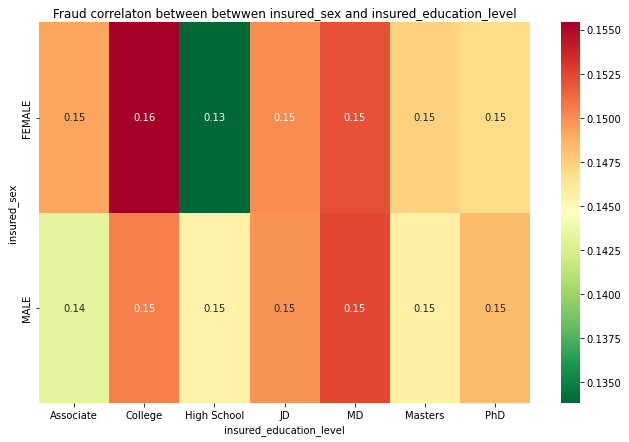

In [55]:
plt.figure(figsize=[11,7])
sns.heatmap(claim_sex_edu,annot=True,cmap='RdYlGn_r')
plt.title("Fraud correlaton between betwwen insured_sex and insured_education_level")
fig.write_html("/data/EDA/Correlation_InsuredSex_InsuredEducationLevel.html")

In [56]:
claim_sex_ocu=pd.pivot_table(data=insurance_claim,index='insured_sex',columns='insured_occupation',values='fraud_flag')
claim_sex_ocu

insured_occupation  adm-clerical  armed-forces  craft-repair  exec-managerial   
insured_sex                                                                     
FEMALE                  0.155159      0.155530      0.153780         0.139703  \
MALE                    0.149062      0.142389      0.143116         0.143767   

insured_occupation  farming-fishing  handlers-cleaners  machine-op-inspct   
insured_sex                                                                 
FEMALE                     0.122151           0.149654           0.140381  \
MALE                       0.151947           0.159343           0.139506   

insured_occupation  other-service  priv-house-serv  prof-specialty   
insured_sex                                                          
FEMALE                   0.155077         0.156340        0.144068  \
MALE                     0.145688         0.145931        0.141060   

insured_occupation  protective-serv     sales  tech-support  transport-moving  
insured_sex                                                                    
FEMALE                     0.132409  0.153369      0.161305          0.144478  
MALE                       0.153031  0.150283      0.153436          0.164942

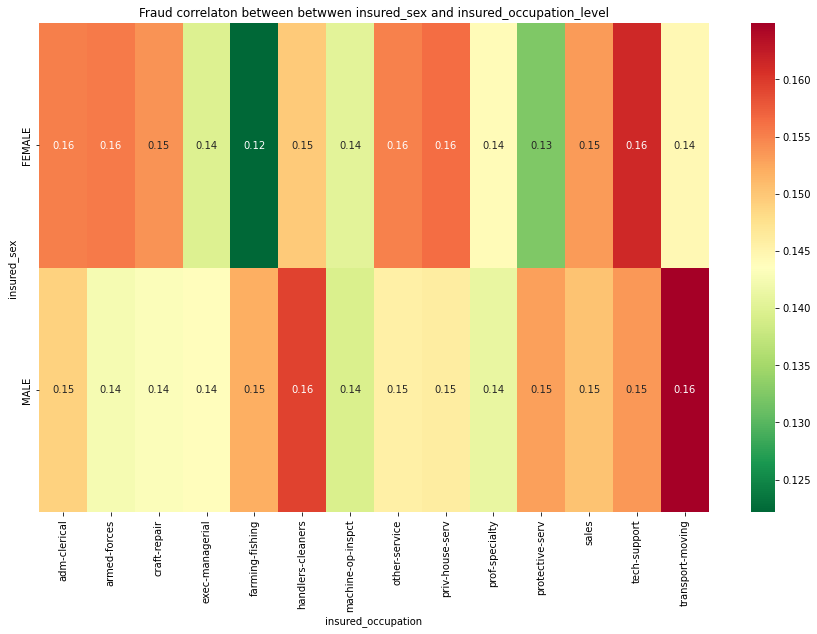

In [57]:
plt.figure(figsize=[15,9])
sns.heatmap(claim_sex_ocu,annot=True,cmap='RdYlGn_r')
plt.title("Fraud correlaton between betwwen insured_sex and insured_occupation_level")
plt.show()

In [58]:
claim_edu_ocu=pd.pivot_table(data=insurance_claim,index='insured_education_level',columns='insured_occupation',values='fraud_flag')
claim_edu_ocu

insured_occupation       adm-clerical  armed-forces  craft-repair   
insured_education_level                                             
Associate                    0.149682      0.143242      0.130164  \
College                      0.170659      0.145202      0.143172   
High School                  0.144543      0.149569      0.147265   
JD                           0.168259      0.150373      0.154304   
MD                           0.152693      0.162960      0.155288   
Masters                      0.144096      0.153249      0.149925   
PhD                          0.112360      0.139127           NaN   

insured_occupation       exec-managerial  farming-fishing  handlers-cleaners   
insured_education_level                                                        
Associate                       0.147950         0.115385           0.128902  \
College                         0.151531         0.147332           0.147959   
High School                     0.126306         0.127721           0.155277   
JD                              0.133077         0.137746           0.157328   
MD                              0.139706         0.135632           0.229258   
Masters                         0.154398         0.129049           0.165073   
PhD                             0.160093         0.150814                NaN   

insured_occupation       machine-op-inspct  other-service  priv-house-serv   
insured_education_level                                                      
Associate                         0.142998       0.146742         0.171279  \
College                           0.147468       0.125522         0.175489   
High School                       0.117262       0.144803         0.112895   
JD                                0.149770       0.135735         0.159969   
MD                                0.141460       0.165175         0.154822   
Masters                           0.149927       0.154222         0.122861   
PhD                               0.138026       0.176900              NaN   

insured_occupation       prof-specialty  protective-serv     sales   
insured_education_level                                              
Associate                      0.131944         0.143100  0.158792  \
College                        0.154301         0.161839  0.151134   
High School                    0.141381         0.127565  0.169805   
JD                             0.162686         0.143169  0.138069   
MD                             0.146341         0.141282  0.151945   
Masters                        0.128988         0.144359  0.134875   
PhD                            0.137337              NaN  0.160920   

insured_occupation       tech-support  transport-moving  
insured_education_level                                  
Associate                    0.151812          0.130075  
College                      0.165354          0.162874  
High School                  0.136090          0.160459  
JD                           0.171963          0.145254  
MD                           0.153071          0.169991  
Masters                      0.159438          0.159180  
PhD                          0.172916          0.150885

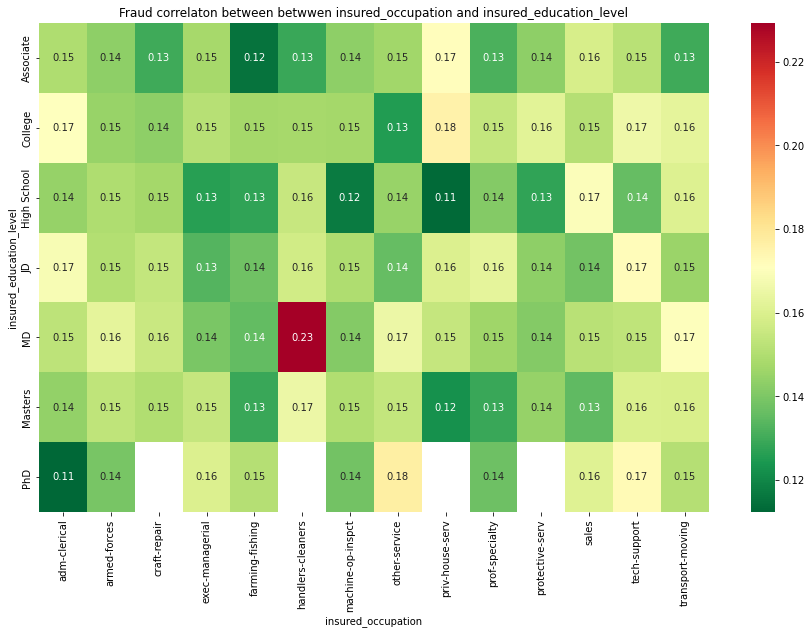

In [59]:
plt.figure(figsize=[15,9])
sns.heatmap(claim_edu_ocu,annot=True,cmap='RdYlGn_r')
plt.title("Fraud correlaton between betwwen insured_occupation and insured_education_level")
plt.show()